## EDA on Black Friday Twitter Texts (Tweets)

### Set up Working Environment
#### Import Relevant Libraries

In [331]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import sys
import os
import csv

from collections import defaultdict, Counter
from collections import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2


sb.set_style("dark")
sb.set()

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)



#### Loading Dataset from Local Host Machine

In [332]:
df = pd.read_csv("D:\Open Classroom\Datasets\BlackFriday_tweets.csv")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,RealMikeNello,"Bakersfield, CA",PEACE ON THE MOON \n#postscript #Studio312 #AR...,2013-02-21 19:55:33+00:00,395,174,1995,False,2021-11-27 10:02:39+00:00,Abracadabra\n☆☆☆☆☆\nExposing every weakness\n#...,"['AI5W', 'Artist', 'postscript', 'art', 'ad', ...",Twitter for Android,False
1,Black Hat Ethical Hacking,World Wide Web,Offensive Security: Black Box Penetration Test...,2016-08-31 08:19:42+00:00,5009,0,1552,False,2021-11-27 10:02:35+00:00,BLACK FRIDAY SPECIAL OFFER IS ON!\n\nOffensive...,NaN,Twitter Web App,False
2,Tks,NaN,Host of The K.Licious Show,2009-04-16 13:24:13+00:00,411,551,2318,False,2021-11-27 10:02:35+00:00,Hopefully Christmas works out. 🤷‍♀️🤯 who did s...,"['blackfriday', 'shopping']",Twitter for Android,False
3,Majestic Stratford,"Stratford-upon-Avon, UK",News and events from the team at Majestic Wine...,2009-08-08 19:39:40+00:00,1103,673,24,False,2021-11-27 10:02:21+00:00,Black Friday offers are still going! 25% off F...,"['blackfridaysale', 'blackfriday']",Twitter for iPhone,False
4,Fangirl Stickers,España,"✨ Holographic stickers for laptops, phones, no...",2020-02-16 11:11:59+00:00,3677,1137,6283,False,2021-11-27 10:02:18+00:00,Christmas gift ideas for fangirls ✨BLACK FRIDA...,"['onedirection', 'Måneskin', 'etsy', 'niallhor...",Twitter for Android,False


#### Statistical Information, Data Manipulation and Cleaning

In [333]:
df.shape

(10000, 13)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         10000 non-null  object
 1   user_location     7072 non-null   object
 2   user_description  9469 non-null   object
 3   user_created      10000 non-null  object
 4   user_followers    10000 non-null  int64 
 5   user_friends      10000 non-null  int64 
 6   user_favourites   10000 non-null  int64 
 7   user_verified     10000 non-null  bool  
 8   date              10000 non-null  object
 9   text              10000 non-null  object
 10  hashtags          7724 non-null   object
 11  source            10000 non-null  object
 12  is_retweet        10000 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 879.0+ KB


In [335]:
round(df.describe(), 2)

,user_followers,user_friends,user_favourites
count,10000.00,10000.00,10000.00
mean,57575.94,1988.89,11860.86
std,1016799.90,9923.54,39258.60
min,0.00,0.00,0.00
25%,95.00,132.00,92.00
50%,417.00,388.00,1167.00
75%,2507.25,1325.25,6496.00
max,77735444.00,302499.00,849358.00


In [336]:
df.isnull().sum()

user_name              0
user_location       2928
user_description     531
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2276
source                 0
is_retweet             0
dtype: int64

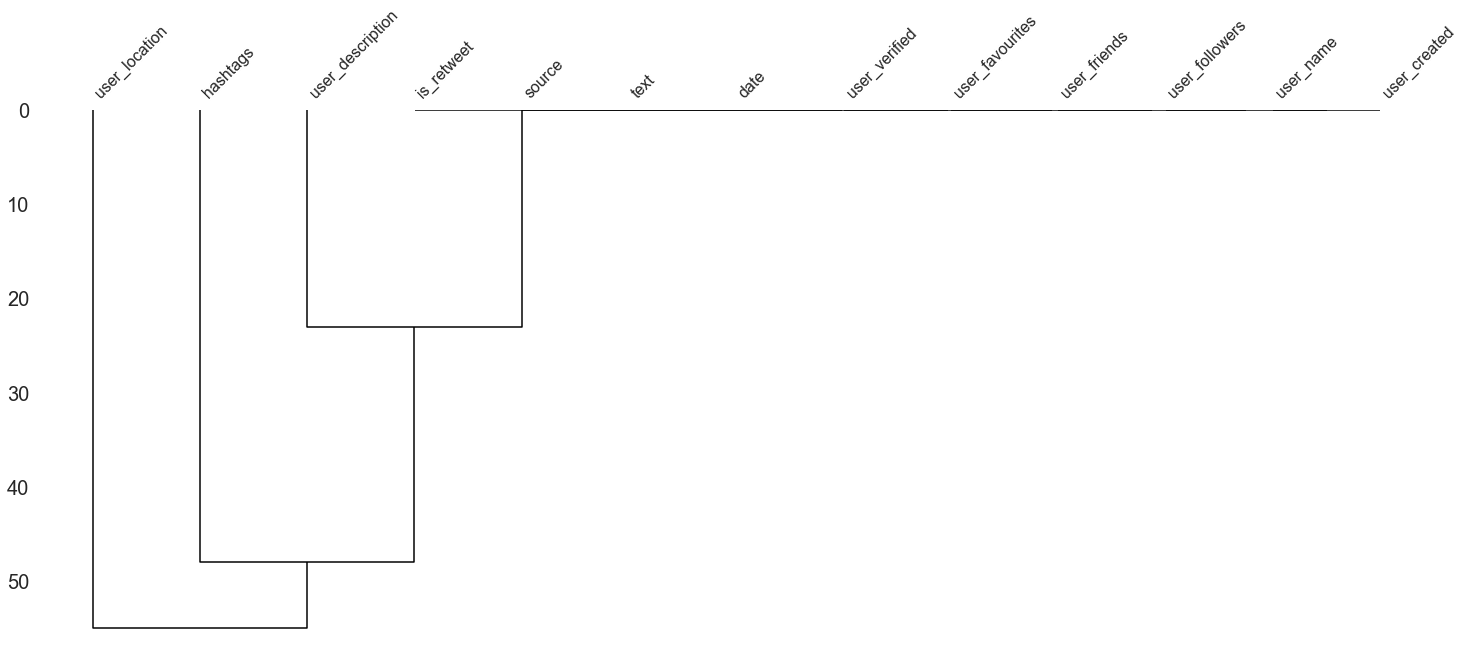

In [337]:
msno.dendrogram(df)

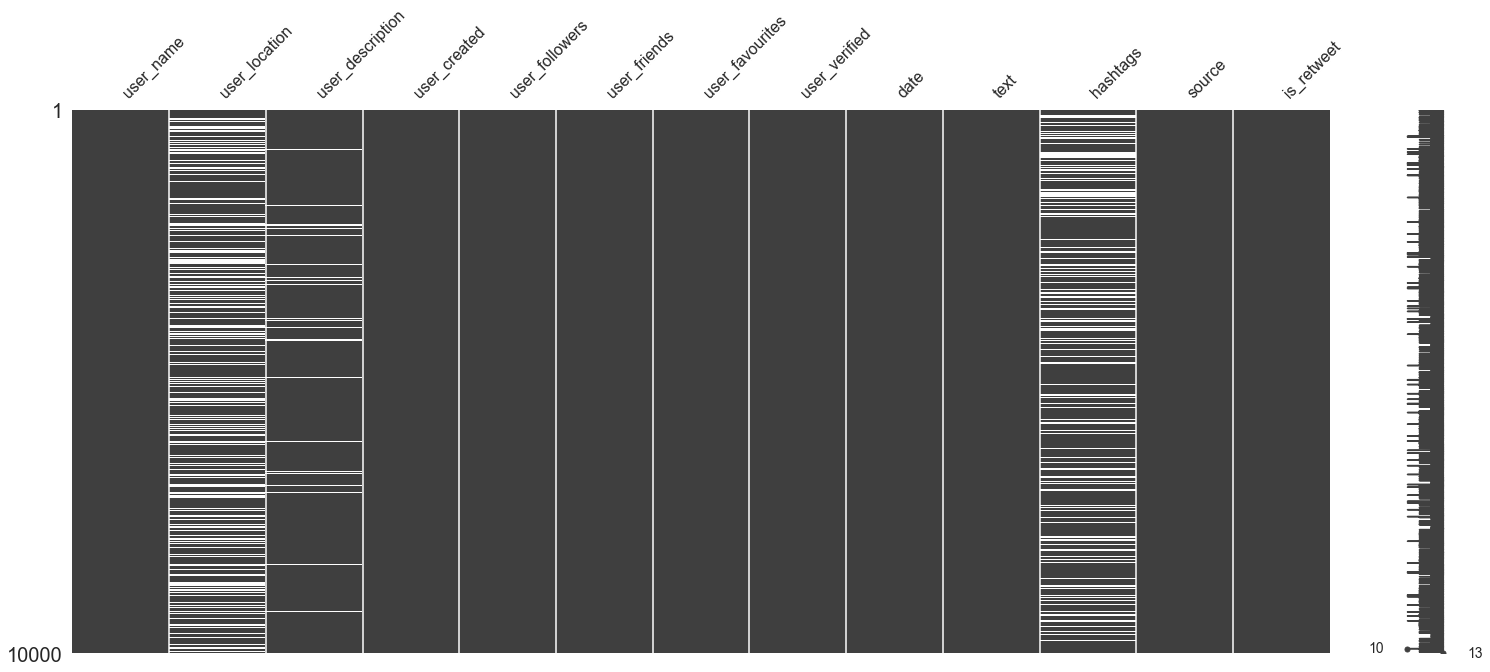

In [338]:
msno.matrix(df)

In [339]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,RealMikeNello,"Bakersfield, CA",PEACE ON THE MOON \n#postscript #Studio312 #AR...,2013-02-21 19:55:33+00:00,395,174,1995,False,2021-11-27 10:02:39+00:00,Abracadabra\n☆☆☆☆☆\nExposing every weakness\n#...,"['AI5W', 'Artist', 'postscript', 'art', 'ad', ...",Twitter for Android,False
1,Black Hat Ethical Hacking,World Wide Web,Offensive Security: Black Box Penetration Test...,2016-08-31 08:19:42+00:00,5009,0,1552,False,2021-11-27 10:02:35+00:00,BLACK FRIDAY SPECIAL OFFER IS ON!\n\nOffensive...,NaN,Twitter Web App,False
2,Tks,NaN,Host of The K.Licious Show,2009-04-16 13:24:13+00:00,411,551,2318,False,2021-11-27 10:02:35+00:00,Hopefully Christmas works out. 🤷‍♀️🤯 who did s...,"['blackfriday', 'shopping']",Twitter for Android,False
3,Majestic Stratford,"Stratford-upon-Avon, UK",News and events from the team at Majestic Wine...,2009-08-08 19:39:40+00:00,1103,673,24,False,2021-11-27 10:02:21+00:00,Black Friday offers are still going! 25% off F...,"['blackfridaysale', 'blackfriday']",Twitter for iPhone,False
4,Fangirl Stickers,España,"✨ Holographic stickers for laptops, phones, no...",2020-02-16 11:11:59+00:00,3677,1137,6283,False,2021-11-27 10:02:18+00:00,Christmas gift ideas for fangirls ✨BLACK FRIDA...,"['onedirection', 'Måneskin', 'etsy', 'niallhor...",Twitter for Android,False


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

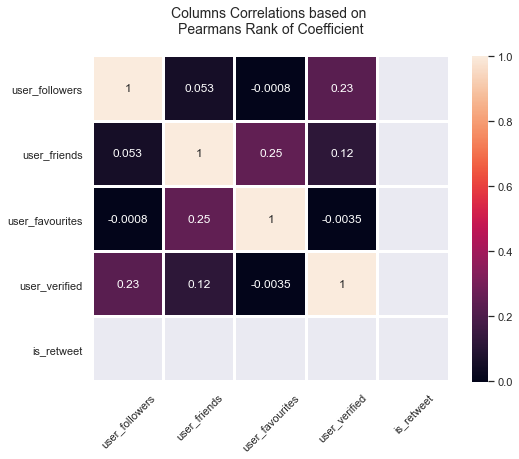

In [340]:

plt.figure(figsize = (8, 6))
sb.heatmap(df.corr(), annot = True, linewidths = 2)
plt.title("Columns Correlations based on \nPearmans Rank of Coefficient\n", fontsize = (14))
plt.xticks(rotation = 45)

In [341]:
def get_int_cols(col):
    if col.dtype == "int64":
        plot = sb.distplot(col)
    else:
        print("Datatype passed is invalid for this operation")
    return plot

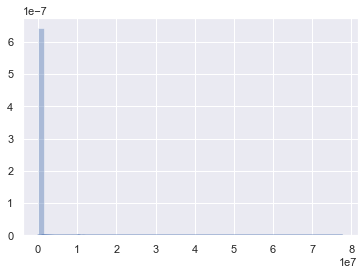

In [342]:
sb.distplot(df[["user_favourites", "user_friends", "user_followers"]])

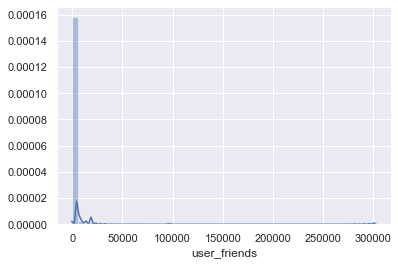

In [343]:
get_int_cols(df["user_friends"])

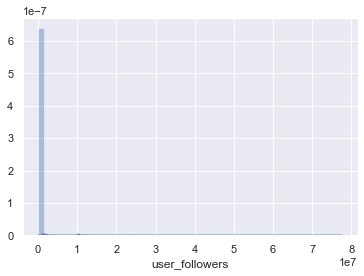

In [344]:
get_int_cols(df["user_followers"])

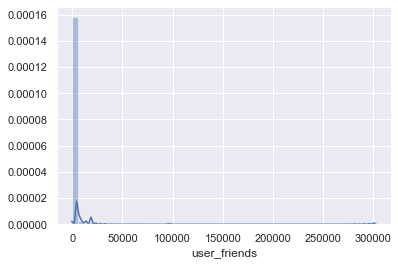

In [345]:
get_int_cols(df["user_friends"])

In [346]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,RealMikeNello,"Bakersfield, CA",PEACE ON THE MOON \n#postscript #Studio312 #AR...,2013-02-21 19:55:33+00:00,395,174,1995,False,2021-11-27 10:02:39+00:00,Abracadabra\n☆☆☆☆☆\nExposing every weakness\n#...,"['AI5W', 'Artist', 'postscript', 'art', 'ad', ...",Twitter for Android,False
1,Black Hat Ethical Hacking,World Wide Web,Offensive Security: Black Box Penetration Test...,2016-08-31 08:19:42+00:00,5009,0,1552,False,2021-11-27 10:02:35+00:00,BLACK FRIDAY SPECIAL OFFER IS ON!\n\nOffensive...,NaN,Twitter Web App,False
2,Tks,NaN,Host of The K.Licious Show,2009-04-16 13:24:13+00:00,411,551,2318,False,2021-11-27 10:02:35+00:00,Hopefully Christmas works out. 🤷‍♀️🤯 who did s...,"['blackfriday', 'shopping']",Twitter for Android,False
3,Majestic Stratford,"Stratford-upon-Avon, UK",News and events from the team at Majestic Wine...,2009-08-08 19:39:40+00:00,1103,673,24,False,2021-11-27 10:02:21+00:00,Black Friday offers are still going! 25% off F...,"['blackfridaysale', 'blackfriday']",Twitter for iPhone,False
4,Fangirl Stickers,España,"✨ Holographic stickers for laptops, phones, no...",2020-02-16 11:11:59+00:00,3677,1137,6283,False,2021-11-27 10:02:18+00:00,Christmas gift ideas for fangirls ✨BLACK FRIDA...,"['onedirection', 'Måneskin', 'etsy', 'niallhor...",Twitter for Android,False


In [347]:
df["hashtags1"] = df["hashtags"].str.split("[", expand = True)[1]
df.to_csv("D:\Open Classroom\Datasets\BlackFriday_tweets_cleaned1.csv")

In [348]:
clean1 = pd.read_csv("D:\Open Classroom\Datasets\BlackFriday_tweets_cleaned1.csv")
clean1.drop(columns = ["Unnamed: 0"], inplace = True)
clean1["hashtags2"] = clean1["hashtags1"].str.split("]", expand = True)[0]
clean1.head()
clean1.to_csv("D:\Open Classroom\Datasets\BlackFriday_tweets_cleaned2.csv")

In [349]:
clean2 = pd.read_csv("D:\Open Classroom\Datasets\BlackFriday_tweets_cleaned2.csv")
clean2["hashtags3"] = clean2["hashtags2"].str.split("''", expand = True)[0]
clean2.drop(columns = ["Unnamed: 0", "Unnamed: 0", "hashtags", "hashtags1", "hashtags2"], inplace = True)
clean2.rename(columns = {"hashtags3": "hashtags"}, inplace = True)
clean2["hashtags"] = clean2["hashtags"].str.replace("'", "")
clean2["hashtags"] = clean2["hashtags"].str.replace(" ", "")
clean2["hashtags"] = clean2["hashtags"].str.lower()
clean2.head()
clean2.to_csv("D:\Open Classroom\Datasets\BlackFriday_tweets_final_cleaned.csv")

In [350]:
df = pd.read_csv("D:\Open Classroom\Datasets\BlackFriday_tweets_final_cleaned.csv")
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head().sample()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,hashtags
4,Fangirl Stickers,España,"✨ Holographic stickers for laptops, phones, no...",2020-02-16 11:11:59+00:00,3677,1137,6283,False,2021-11-27 10:02:18+00:00,Christmas gift ideas for fangirls ✨BLACK FRIDA...,Twitter for Android,False,"onedirection,måneskin,etsy,niallhoran"


In [351]:
df["hashtags"].unique()

array(['ai5w,artist,postscript,art,ad,ai,music,artpress,blackfriday', nan,
       'blackfriday,shopping', ..., 'blackfriday,farscape',
       'blackfriday,dtc,shopify,d2c', 'mileycyrus,art,fanart,blackfriday'],
      dtype=object)

### Exploring the Dataset with CSV Library
#### Perform in-depth analysis and communicate Results 

[('blackfriday', 6266), ('', 2276), ('freeshipping', 838), ('blackfriday2021', 286), ('cybermonday', 256), ('christmas', 189), ('gift', 137), ('deal', 117), ('oferta', 113), ('promoÃ§Ã£o', 112), ('giveaway', 107), ('bitcoin', 107), ('wordpress', 104), ('shopsmall', 98), ('twitter', 92)]


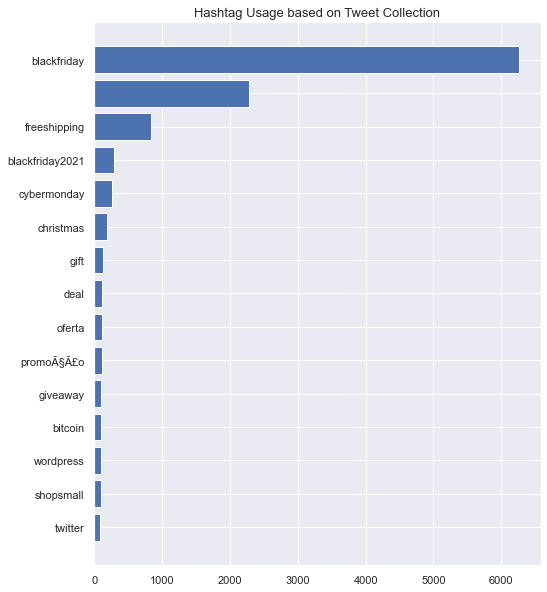

In [352]:
with open("D:\Open Classroom\Datasets\BlackFriday_tweets_final_cleaned.csv", encoding = 'latin1') as file:
    BF_Reader = csv.DictReader(file)
    BF_Counter = Counter()
    BF_Dict = defaultdict()
    
    for i in BF_Reader:
        hashtag = i["hashtags"].split(",")
        
        for rec in hashtag:
            BF_Counter[rec] += 1
        
        
hashtag = []
popularity = []

for i in BF_Counter.most_common(15):
    hashtag.append(i[0])
    popularity.append(i[1])
    

popularity.reverse()
hashtag.reverse()


plt.figure(figsize = (8,10))
plt.barh(hashtag, popularity)
plt.title("Hashtag Usage based on Tweet Collection", fontsize = 13)
        

print(BF_Counter.most_common(15))

[('Twitter Web App', 2446), ('Twitter for iPhone', 2416), ('Twitter for Android', 1785), ('Sharious.com', 837), ('Hootsuite Inc.', 325), ('TweetDeck', 214), ('Buffer', 187), ('Instagram', 147), ('Promobit', 121), ('Sprout Social', 108)]


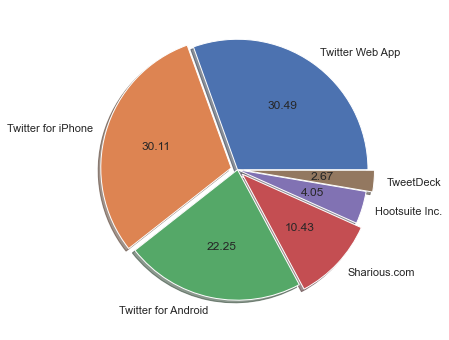

In [353]:
with open("D:\Open Classroom\Datasets\BlackFriday_tweets_final_cleaned.csv", encoding = 'latin1') as file:
    source_reader = csv.DictReader(file)
    source_Counter = Counter()
    
    for i in source_reader:
        source_Counter[i["source"]] += 1
        
        
source = []
pop = []
        
for i in source_Counter.most_common(6):
    source.append(i[0])
    pop.append(i[1])
    
    
explode = [0, 0.05, 0, 0.05, 0, 0.05]
plt.figure(figsize = (6, 6))
plt.pie(x = pop, labels = source, autopct = '%.2f', explode = explode, shadow = True)

    
        
print(source_Counter.most_common(10))

In [354]:
df.head(2)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,hashtags
0,RealMikeNello,"Bakersfield, CA",PEACE ON THE MOON \n#postscript #Studio312 #AR...,2013-02-21 19:55:33+00:00,395,174,1995,False,2021-11-27 10:02:39+00:00,Abracadabra\n☆☆☆☆☆\nExposing every weakness\n#...,Twitter for Android,False,"ai5w,artist,postscript,art,ad,ai,music,artpres..."
1,Black Hat Ethical Hacking,World Wide Web,Offensive Security: Black Box Penetration Test...,2016-08-31 08:19:42+00:00,5009,0,1552,False,2021-11-27 10:02:35+00:00,BLACK FRIDAY SPECIAL OFFER IS ON!\n\nOffensive...,Twitter Web App,False,NaN


[('False', 9520), ('True', 480)]


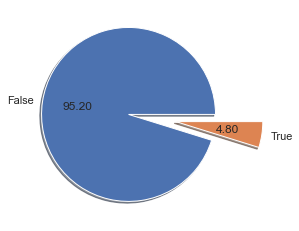

In [374]:
with open("D:\Open Classroom\Datasets\BlackFriday_tweets_final_cleaned.csv", encoding = 'latin1') as file:
    source_Reader = csv.DictReader(file)
    source_Dict = defaultdict()
    source_Counter = Counter()
    
    for i in source_Reader:
        source_Counter[i["user_verified"]] += 1

        
verification = []
total_users = []

for i in source_Counter.most_common():
    verification.append(i[0])
    total_users.append(i[1])

plt.pie(x = total_users, labels = verification, explode = [0.05, 0.5], shadow = True, autopct = '%.2f')

print(source_Counter.most_common())